#  Selected molecular descriptors from the Dragon chemoinformatics application were used to predict bioconcentration factors for 779 chemicals in order to evaluate QSAR (Quantitative Structure Activity Relationship). This dataset was obtained from the UCI machine learning repository. The dataset consists of 779 observations of 10 attributes.
# Below is a brief description of each feature and the response variable logBCF in our dataset
# 1.nHM- number of heavy atoms (integer)
# 2.piPC09- molecular multiple path count (numeric)
# 3.PCD- difference between multiple path count and path count (numeric)
# 4.X2Av- average valence connectivity (numeric)
# 5.MLOGP- Moriguchi octanol-water partition coefficient (numeric)
# 6.ON1V- overall modified Zagreb index by valence vertex degrees (numeric)
# 7.N.072- Frequency of RCO-N< / >N-X=X fragments (integer)
# 8.B02[C-N]- Presence/Absence of C-N atom pairs (binary)
# 9.F04[C-O]- Frequency of C-O atom pairs (integer)
# 10.logBCF- Bioconcentration Factor in log units (numeric)



***Note : Write inference whenever it is required.***

1. Import required Library

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

2. Read the dataset (tab, csv, xls, txt, inbuilt dataset) and display no of rows and columns in dataset.

In [31]:
data = pd.read_csv("dataproject.csv", encoding='latin1')
print("Number of rows and columns:", data.shape)

Number of rows and columns: (779, 14)


3. Display top five rows.

In [32]:
print(data.head())

       ÿCAS                              SMILES    Set  nHM  piPC09   PCD  \
0  100-02-7             O=[N+](c1ccc(cc1)O)[O-]  Train    0     0.0  1.49   
1  100-17-4            O=[N+](c1ccc(cc1)OC)[O-]  Train    0     0.0  1.47   
2  100-18-5                c1cc(ccc1C(C)C)C(C)C  Train    0     0.0  1.20   
3  100-25-4  O=[N+]([O-])c1ccc(cc1)[N+](=O)[O-]  Train    0     0.0  1.69   
4  100-40-3                        C=CC1CCC=CC1  Train    0     0.0  0.52   

   X2Av  MLOGP  ON1V  N-072  B02[C-N]  F04[C-O]  Class  logBCF  
0  0.14   1.35  0.72      0         1         5      1    0.74  
1  0.14   1.70  0.88      0         1         5      1    0.93  
2  0.25   4.14  2.06      0         0         0      3    3.24  
3  0.13   1.89  0.79      0         1         8      3   -0.40  
4  0.25   2.65  1.31      0         0         0      1    2.24  


4.(a) Drop unnecessary columns(ÿCAS,SMILES,Set,Class).
4.(b) Drop the Target variable

In [33]:
data.drop(columns=['ÿCAS', 'SMILES', 'Set', 'Class'], inplace=True)

In [34]:
target_variable = data.pop('logBCF')

5.(a) Describe the dataset.

In [35]:
print(data.describe())
print(data.dtypes)
print(data.isnull().sum())
print(data.corr)

              nHM      piPC09         PCD        X2Av       MLOGP        ON1V  \
count  779.000000  779.000000  779.000000  779.000000  779.000000  779.000000   
mean     1.754814    3.467616    1.550822    0.236881    3.201746    1.510295   
std      1.985866    2.983778    0.958708    0.149319    1.595702    0.834753   
min      0.000000    0.000000    0.000000    0.090000   -1.960000    0.080000   
25%      0.000000    0.000000    1.210000    0.170000    2.190000    0.910000   
50%      1.000000    4.263000    1.400000    0.200000    3.130000    1.270000   
75%      3.000000    6.250000    2.285000    0.240000    4.235000    2.020000   
max     12.000000    9.316000    5.900000    2.230000    8.320000    7.190000   

            N-072    B02[C-N]    F04[C-O]  
count  779.000000  779.000000  779.000000  
mean     0.186136    0.423620    3.585366  
std      0.501937    0.494449    4.430421  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%   

5.(b)  Do proper EDA over dataset (5 Marks)

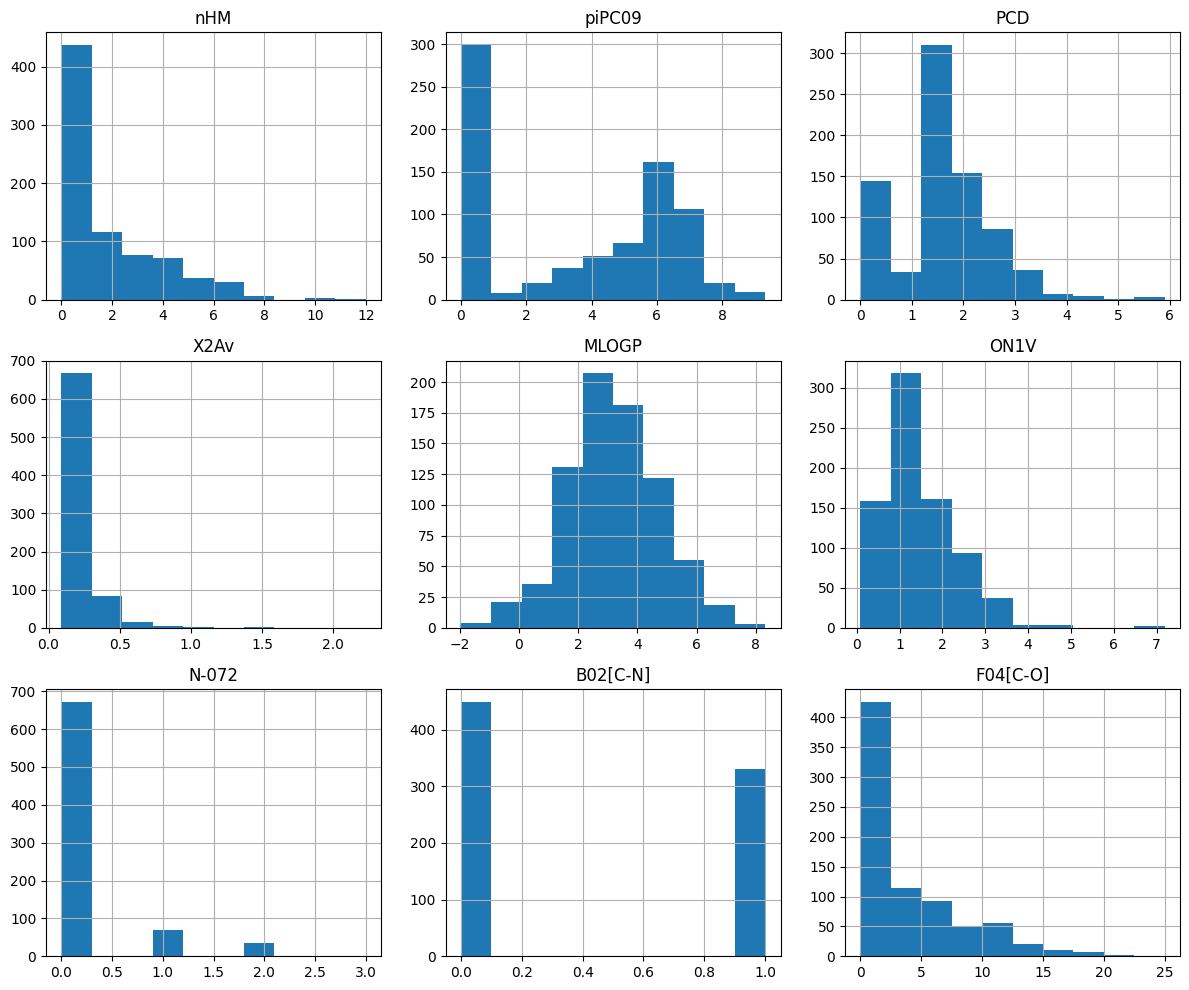

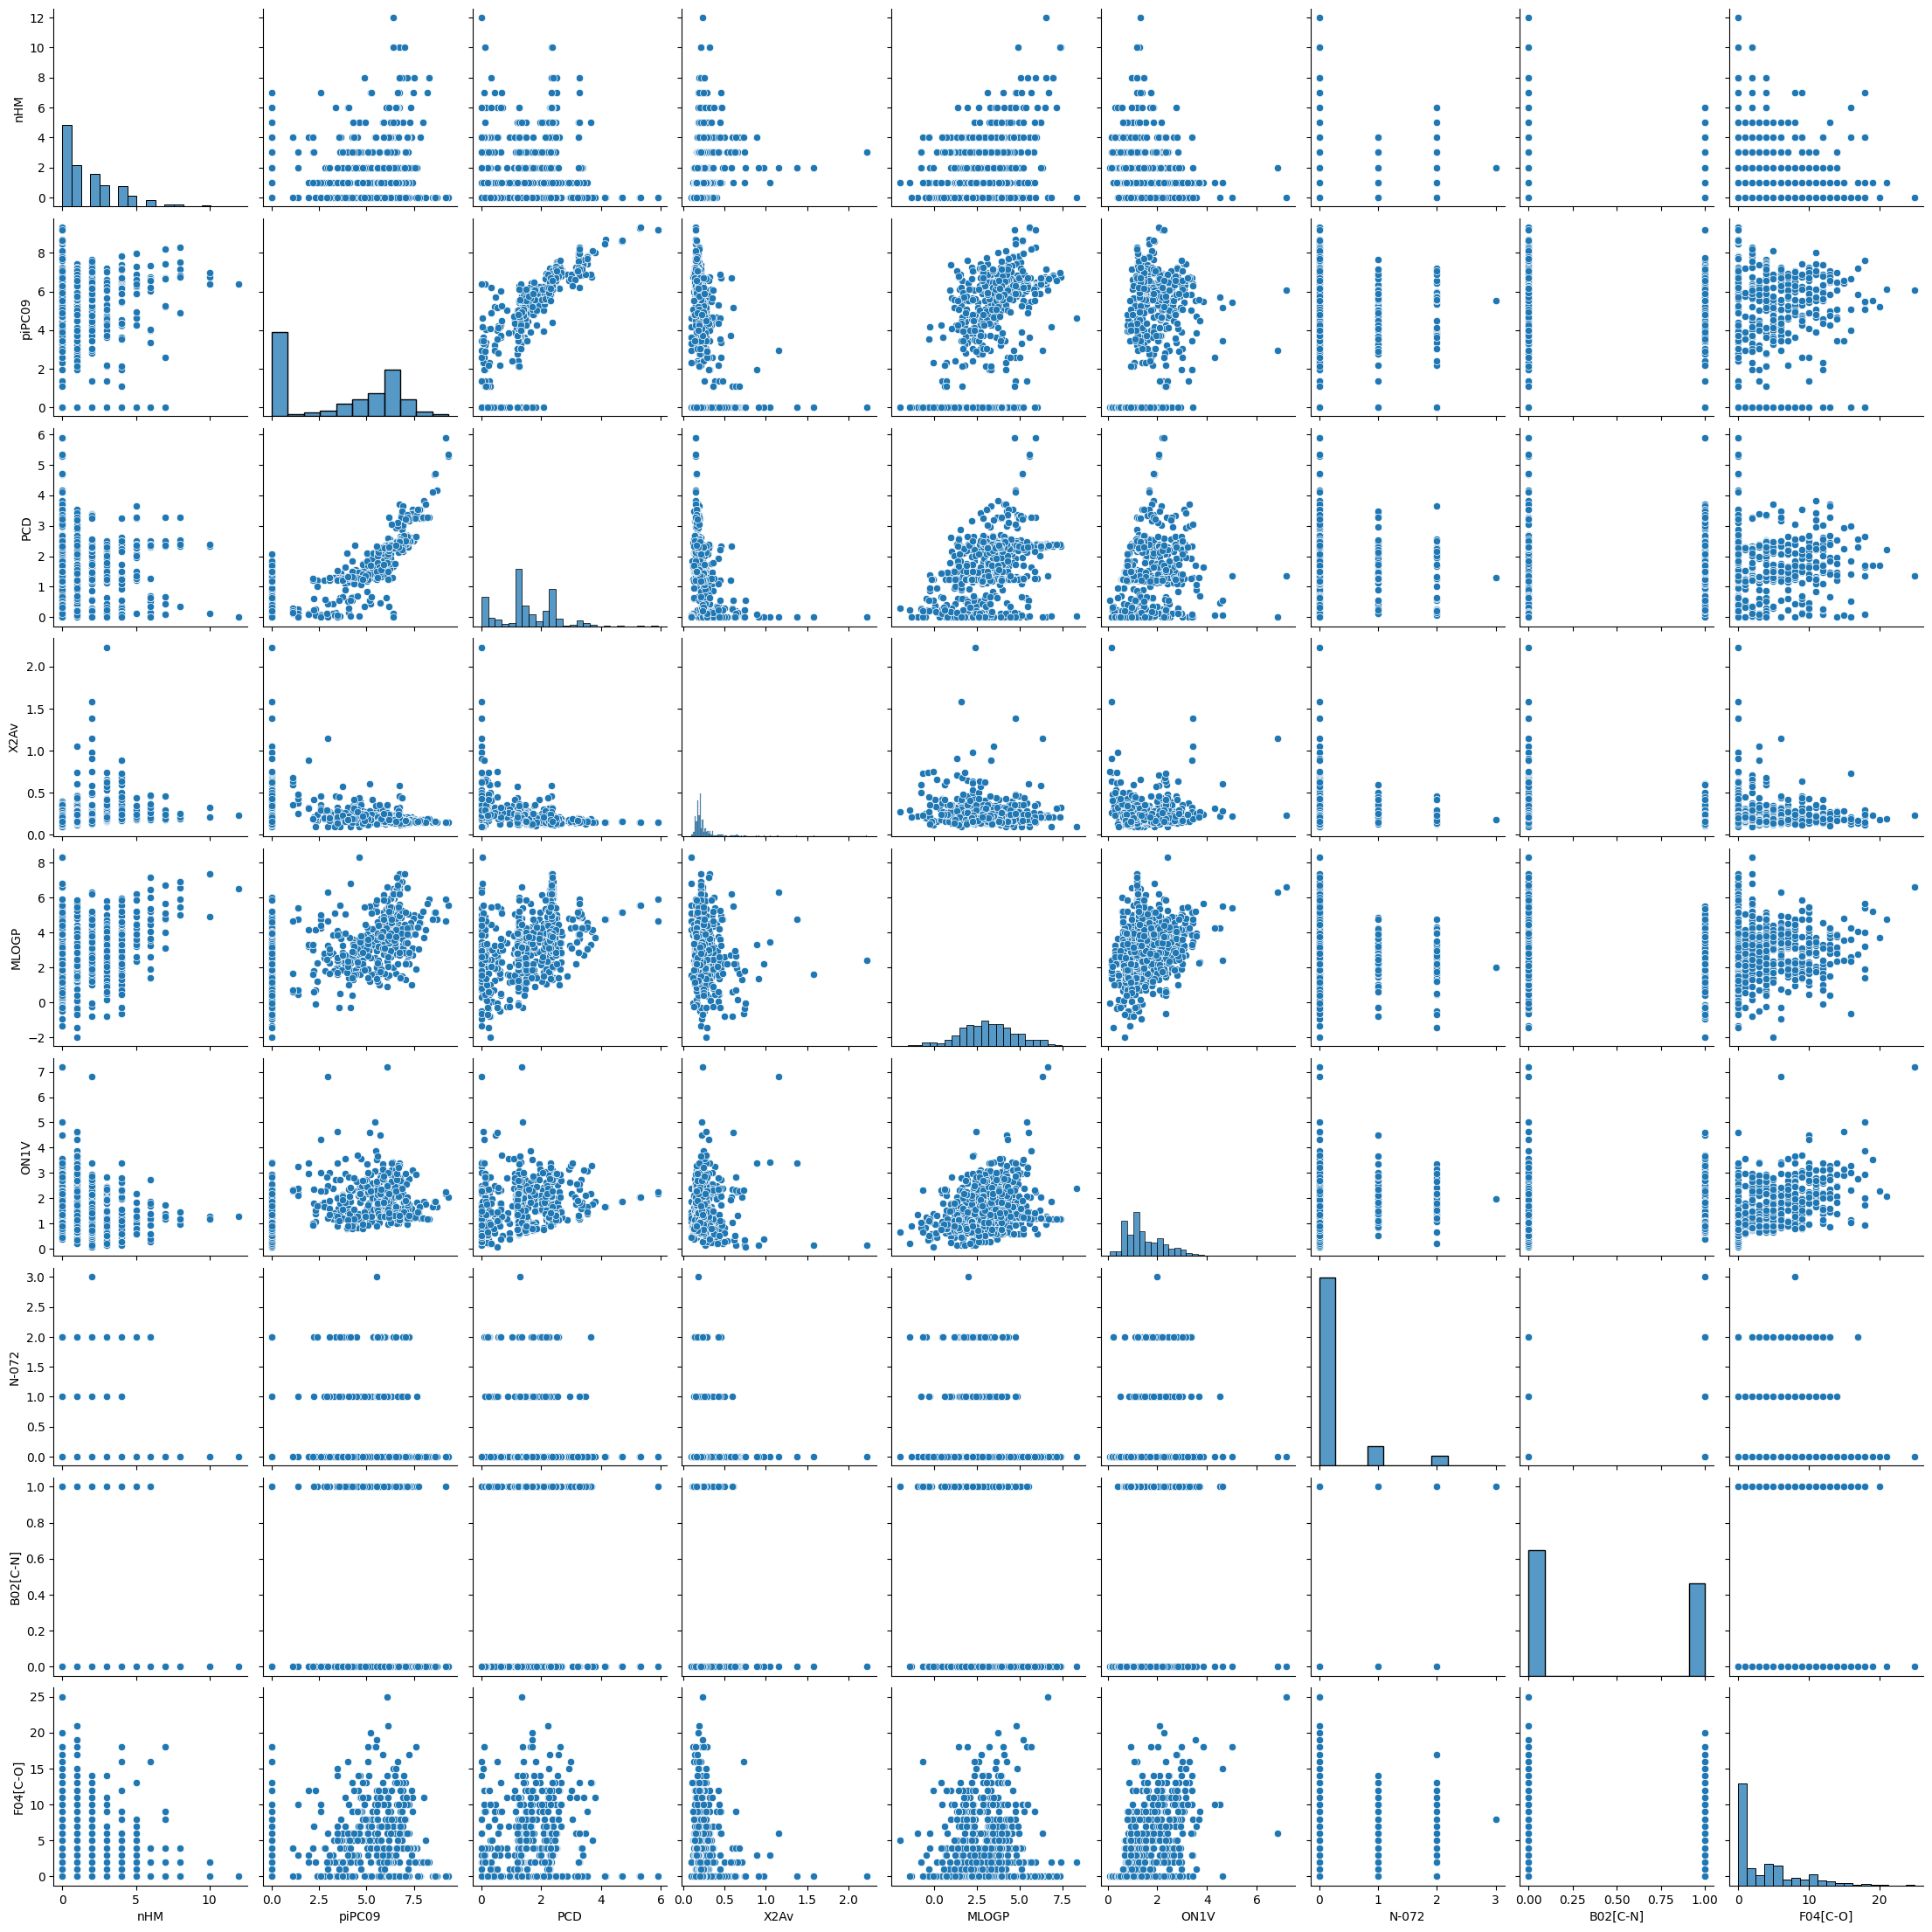

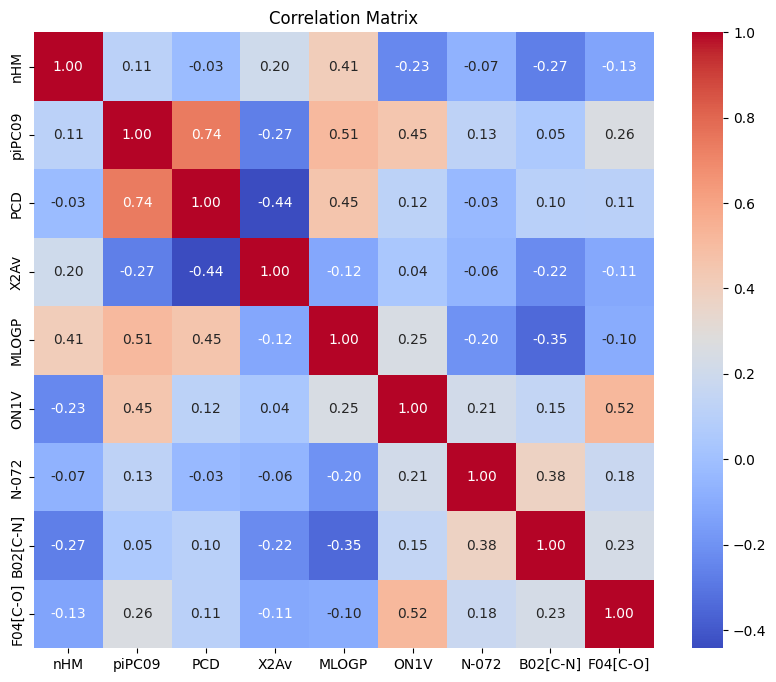

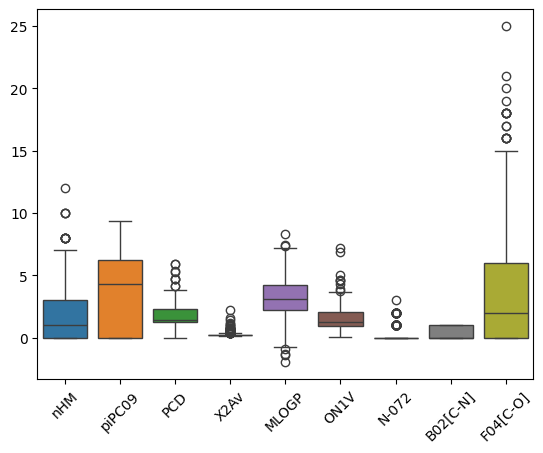

In [36]:
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

sns.pairplot(data)
plt.show()


plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

6. Apply scaling techinque  and transform the data.

In [37]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[-0.88421955, -1.1629029 , -0.06348197, ..., -0.37107343,
         1.1664502 ,  0.31950531],
       [-0.88421955, -1.1629029 , -0.08435679, ..., -0.37107343,
         1.1664502 ,  0.31950531],
       [-0.88421955, -1.1629029 , -0.36616689, ..., -0.37107343,
        -0.85730193, -0.80978071],
       ...,
       [-0.88421955, -1.1629029 ,  0.16614107, ..., -0.37107343,
         1.1664502 ,  0.99707693],
       [-0.88421955, -1.1629029 , -0.3766043 , ..., -0.37107343,
        -0.85730193, -0.58392351],
       [-0.88421955, -1.1629029 , -0.06348197, ..., -0.37107343,
         1.1664502 ,  0.09364811]])

7(a). Apply KMeans Clustering from k = 1 to 10 and display WSS values. (1 mark)
7(b). Display Elbow curve for above k values. (2 marks)
7(c). Apply KMeans Clustering for specific k value (2 marks)
7(d). Display predicted labels with x as piPC09 and y as PCD with hue as kmeans predicetd label. (1 mark)
7(e). Write proper inference

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

WSS values:
k=1: 7011.000000000002
k=2: 5502.85419104872
k=3: 4582.577837656349
k=4: 4046.332868374974
k=5: 3580.4925601748337
k=6: 3207.6162376637776
k=7: 2865.9089844787077
k=8: 2706.6475688741048
k=9: 2542.346769164417
k=10: 2421.314393232061


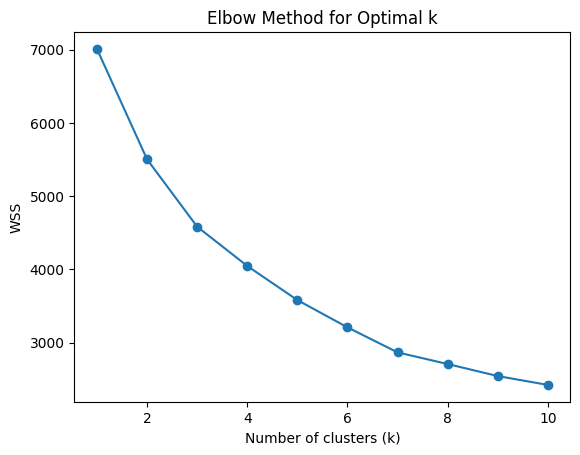

In [38]:
wss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wss.append(kmeans.inertia_)

print("WSS values:")
for i, wss_value in enumerate(wss):
    print(f"k={i+1}: {wss_value}")


plt.plot(range(1, 11), wss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WSS')
plt.title('Elbow Method for Optimal k')
plt.show()


In [39]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

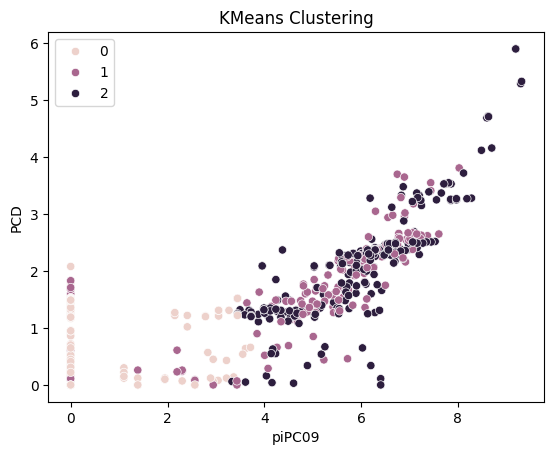

In [40]:
import seaborn as sns

sns.scatterplot(x='piPC09', y='PCD', hue=kmeans.labels_, data=data)
plt.title('KMeans Clustering')
plt.xlabel('piPC09')
plt.ylabel('PCD')
plt.show()


Elbow Method Analysis:

The Elbow Method is used to determine the optimal number of clusters (k) for KMeans clustering.
The plot generated by the Elbow Method shows the relationship between the number of clusters and the Within-Cluster Sum of Squares (WSS).
The 'elbow point' on the plot, where the rate of decrease in WSS slows down, indicates the optimal number of clusters.
In this case, the plot suggests that the optimal number of clusters could be around k=3, as this is where the rate of decrease in WSS significantly slows down.
KMeans Clustering:

After determining the optimal value of k using the Elbow Method, KMeans clustering is performed with k=3.
KMeans algorithm partitions the data into 'k' clusters based on similarity.
Each data point is assigned to the cluster with the nearest centroid.
The 'piPC09' and 'PCD' features are used for clustering, where 'piPC09' likely represents one feature and 'PCD' represents another feature.
Visualization:

The clustering results are visualized using a scatter plot.
The x-axis represents one feature ('piPC09'), the y-axis represents another feature ('PCD'), and the points are colored based on the clusters assigned by KMeans.
This visualization helps to understand how the data points are grouped into clusters based on the chosen features.
It allows for the identification of any distinct patterns or separations among the data points.

8(a). Apply Agglomerative Clustering with different no. of cluster
8(b). Choose appropriate evaluation metric to find best no. of clusters
8(c). Display predicted labels with x as piPC09 and y as PCD with hue as agglometrative predicetd label.
8(d). Write proper inference

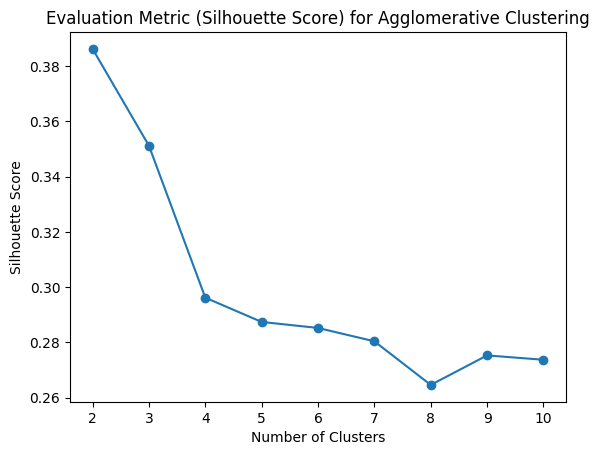

In [41]:
from sklearn.metrics import silhouette_score

evaluation_scores = []

for k in range(2, 11):
    agglomerative = AgglomerativeClustering(n_clusters=k)
    agglomerative.fit(data)
    silhouette_avg = silhouette_score(data, agglomerative.labels_)
    evaluation_scores.append(silhouette_avg)

plt.plot(range(2, 11), evaluation_scores, marker='o')
plt.title('Evaluation Metric (Silhouette Score) for Agglomerative Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


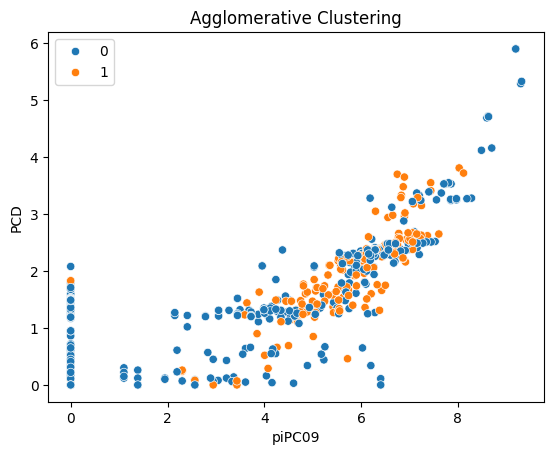

In [42]:
import seaborn as sns

best_k = evaluation_scores.index(max(evaluation_scores)) + 2
agglomerative = AgglomerativeClustering(n_clusters=best_k)
agglomerative.fit(data)

sns.scatterplot(x='piPC09', y='PCD', hue=agglomerative.labels_, data=data)
plt.title('Agglomerative Clustering')
plt.xlabel('piPC09')
plt.ylabel('PCD')
plt.show()


Evaluation Metric (Silhouette Score) Analysis:

The Silhouette Score is used as an evaluation metric to assess the quality of Agglomerative Clustering for different numbers of clusters (k).
For each value of k ranging from 2 to 10, Agglomerative Clustering is applied, and the Silhouette Score is computed.
The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. Higher scores indicate better clustering performance.
The plot shows the Silhouette Scores for different values of k, helping to determine the optimal number of clusters.
Optimal Number of Clusters:

The optimal number of clusters (best_k) is determined based on the highest Silhouette Score obtained.
The index of the maximum Silhouette Score in the evaluation_scores list is found, and 2 is added to it to get the optimal number of clusters.
This optimal k value is then used for performing Agglomerative Clustering.
Agglomerative Clustering:

Agglomerative Clustering is performed again with the optimal number of clusters determined earlier.
Agglomerative Clustering is a hierarchical clustering method that recursively merges the pair of clusters that minimally increases a given linkage distance.
This method creates a tree of clusters where each data point starts in its own cluster and clusters are iteratively merged until a stopping criterion is satisfied.
Visualization:

The clustering results are visualized using a scatter plot.
The x-axis represents 'piPC09', the y-axis represents 'PCD', and the points are colored based on the clusters assigned by Agglomerative Clustering.
This visualization helps to understand how the data points are grouped into clusters based on the hierarchical clustering approach.

9(a). Apply DBSCAN Technique
9(b). Choose proper parameter for eps,min
9(c). Display predicted labels with x as piPC09 and y as PCD with hue as DBSCAN predicetd label.
9(d). Write proper inference

In [43]:
from sklearn.cluster import DBSCAN
import seaborn as sns


dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data)


DBSCAN()

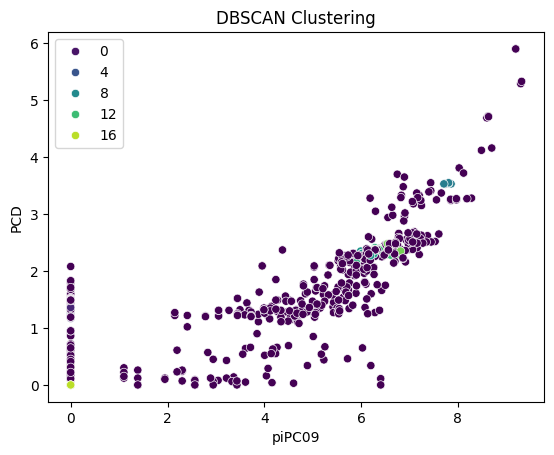

In [44]:
sns.scatterplot(x='piPC09', y='PCD', hue=dbscan.labels_, palette='viridis', data=data)
plt.title('DBSCAN Clustering')
plt.xlabel('piPC09')
plt.ylabel('PCD')
plt.show()


DBSCAN Clustering:

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm.
It groups together closely packed points based on two parameters: epsilon (eps) and min_samples.
Points within the same dense region are considered part of the same cluster, while points that are isolated or in low-density regions are labeled as noise.
Parameters:

The eps parameter specifies the maximum distance between two samples for one to be considered as being in the neighborhood of the other.
The min_samples parameter sets the number of samples in a neighborhood for a point to be considered a core point.
Clustering Process:

DBSCAN is applied to the data with epsilon (eps) set to 0.5 and min_samples set to 5.
The algorithm identifies clusters and assigns labels to each data point. Data points labeled as -1 are considered noise points.
DBSCAN does not require specifying the number of clusters in advance, as it dynamically determines clusters based on the density of data points.
Visualization:

The clustering results are visualized using a scatter plot.
The x-axis represents 'piPC09', the y-axis represents 'PCD', and the points are colored based on the clusters assigned by DBSCAN.
Points labeled as noise (with label -1) are usually displayed in a separate color or left uncolored, indicating that they do not belong to any specific cluster.
This visualization helps in understanding how DBSCAN groups the data points based on their density and identifies any outliers or noise points.

10(a). Apply GMM  Soft clustering and display the clustered labels.
10(b). Also evaluate the cluster using proper metrics

In [45]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(data)

cluster_labels = gmm.predict(data)

In [46]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data, cluster_labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.16763162849783192


11(a). Apply FCM  Soft clustering and display the clustered labels.
11(b). Also evaluate the cluster using proper metrics

In [47]:
!pip install -U scikit-fuzzy

import numpy as np
from sklearn.metrics import silhouette_score
from skfuzzy import cmeans

data_array = np.array(data)

n_clusters = 3
cntr, u, u0, d, jm, p, fpc = cmeans(data_array.T, n_clusters, 2, error=0.005, maxiter=1000)

cluster_labels = np.argmax(u, axis=0)

silhouette_avg = silhouette_score(data_array, cluster_labels)
print("Silhouette Score:", silhouette_avg)



Silhouette Score: 0.388497551661532


12(a). Apply PCA and display explained variance.
12(b). Display Cumulative variance.
12(c). Apply proper technique to find optimal n_components for pca
12(d). Decompose the dataset with by retaining 95% of information using PCA

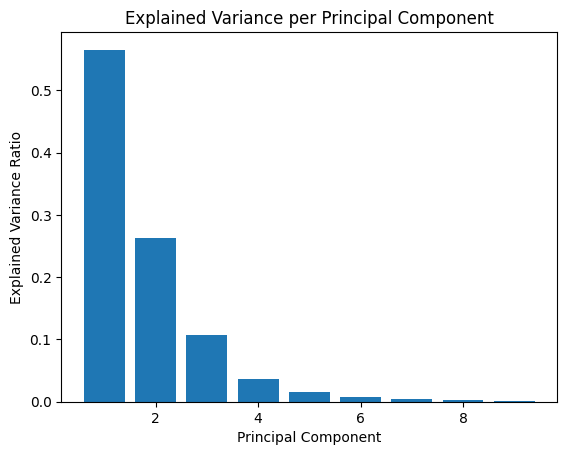

In [48]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(data)

explained_variance = pca.explained_variance_ratio_
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance per Principal Component')
plt.show()


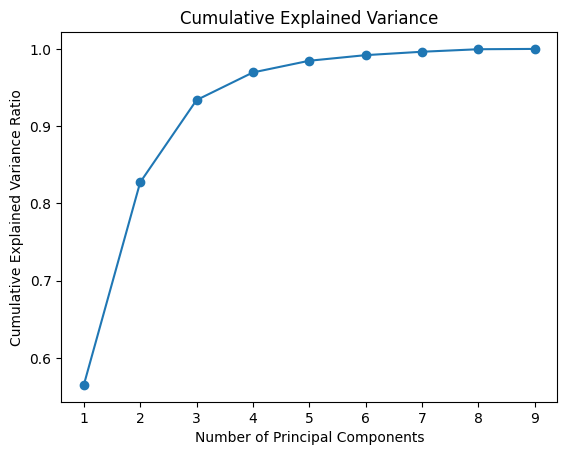

In [49]:
cumulative_variance = np.cumsum(explained_variance)

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')
plt.show()


In [50]:
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

pca_95 = PCA(n_components=n_components_95)
data_reduced = pca_95.fit_transform(data)

retained_variance = np.sum(pca_95.explained_variance_ratio_)
print("Retained Variance with 95% Information:", retained_variance)


Retained Variance with 95% Information: 0.9695522419759893


13(a) Cluster the decomposed pca data into optimal cluster with most suitable hard & soft clustering method
13(b) Write the inferenece for the above

In [51]:
from sklearn.cluster import KMeans
from skfuzzy.cluster import cmeans

kmeans = KMeans(n_clusters=n_components_95, random_state=42)
kmeans.fit(data_reduced)
hard_cluster_labels = kmeans.labels_

cntr, u, _, _, _, _, _ = cmeans(data_reduced.T, n_components_95, 2, error=0.005, maxiter=1000)
soft_cluster_labels = np.argmax(u, axis=0)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


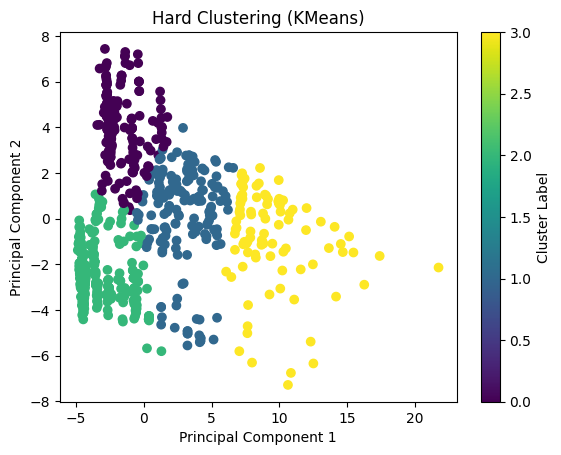

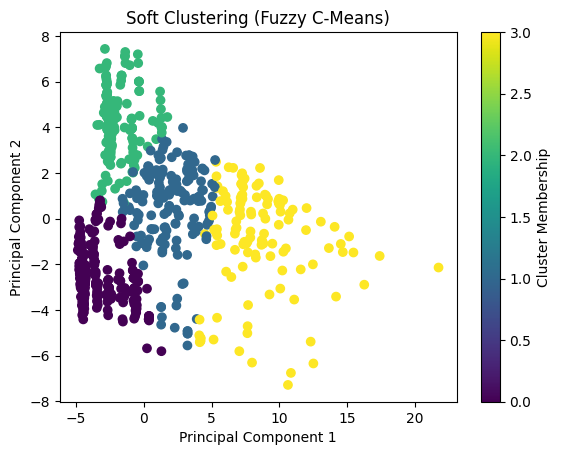

In [52]:
import matplotlib.pyplot as plt

plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=hard_cluster_labels, cmap='viridis')
plt.title('Hard Clustering (KMeans)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=soft_cluster_labels, cmap='viridis')
plt.title('Soft Clustering (Fuzzy C-Means)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Membership')
plt.show()


Hard Clustering (KMeans):

KMeans clustering is a partitioning algorithm that assigns each data point to exactly one cluster.
In hard clustering, each data point is assigned a discrete cluster label, representing its strict membership in a single cluster.
The scatter plot visualizes the results of hard clustering, where each point is colored according to its assigned cluster label.
Hard clustering is useful when the data naturally forms distinct clusters with clear boundaries.
Soft Clustering (Fuzzy C-Means):

Fuzzy C-Means clustering is a soft clustering algorithm that assigns each data point a degree of membership to each cluster.
In soft clustering, each data point is associated with a set of membership values, indicating its degree of belongingness to each cluster.
The scatter plot visualizes the results of soft clustering, where each point's color represents its membership distribution across clusters.
Soft clustering is beneficial when data points may belong to multiple clusters simultaneously or when there is uncertainty in cluster assignments.
Comparison:

Hard clustering provides clear-cut assignments of data points to clusters, making it suitable for datasets with well-defined clusters and little overlap.
Soft clustering, on the other hand, captures the inherent fuzziness or uncertainty in data by allowing for partial memberships, making it more flexible in capturing complex structures and overlapping clusters.
By comparing the two plots, one can observe the differences in cluster assignments between hard and soft clustering approaches.
Hard clustering may result in more distinct clusters, while soft clustering may reveal subtle variations and overlaps in the data distribution.
Principal Component Analysis (PCA):

The data seems to have been reduced using PCA, as the scatter plots visualize the first two principal components.
PCA is a dimensionality reduction technique commonly used to visualize high-dimensional data in lower dimensions while preserving most of its variance.
The first two principal components often capture the most significant variation in the data, making them suitable for visualization purposes.

14(a). Apply SVD and display explained variance.
14(b). Display Cumulative variance.
14(c). Apply proper technique to find optimal n_components for svd
14(d). Decompose the dataset with by retaining 90% of information using PCA

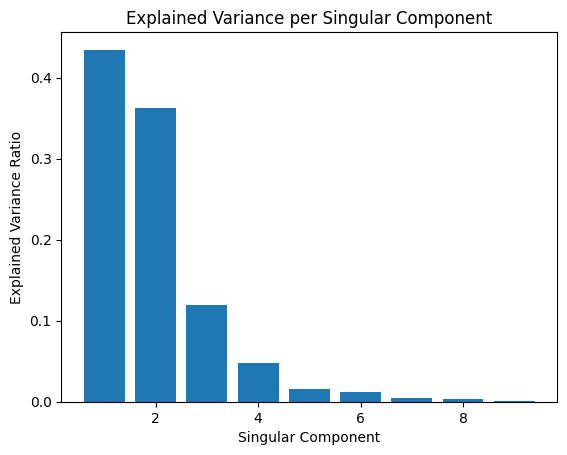

In [53]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

svd = TruncatedSVD(n_components=min(data.shape), random_state=42)
svd.fit(data)

explained_variance = svd.explained_variance_ratio_
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Singular Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance per Singular Component')
plt.show()


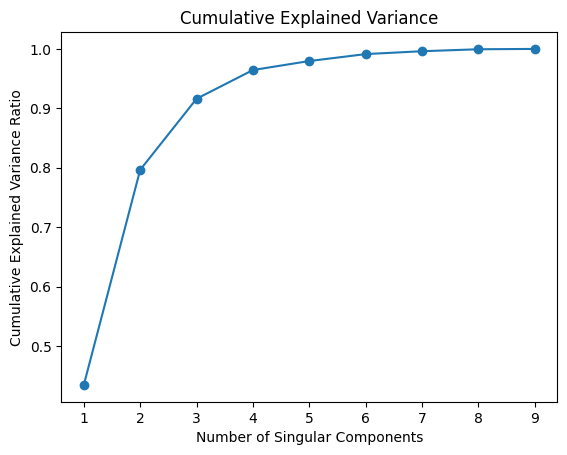

In [54]:
cumulative_variance = np.cumsum(explained_variance)

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Singular Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')
plt.show()


In [55]:
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

svd_90 = TruncatedSVD(n_components=n_components_90, random_state=42)
data_reduced_svd = svd_90.fit_transform(data)

retained_variance_svd = np.sum(svd_90.explained_variance_ratio_)
print("Retained Variance with 90% Information:", retained_variance_svd)


Retained Variance with 90% Information: 0.9161041126335396


15(a). Cluster the decomposed svd data into optimal cluster with most suitable hard & soft clustering method
15(b). Write the inferenece for the above


In [56]:
from sklearn.cluster import KMeans
from skfuzzy.cluster import cmeans

kmeans = KMeans(n_clusters=n_components_90, random_state=42)
kmeans.fit(data_reduced_svd)
hard_cluster_labels = kmeans.labels_

cntr, u, _, _, _, _, _ = cmeans(data_reduced_svd.T, n_components_90, 2, error=0.005, maxiter=1000)
soft_cluster_labels = np.argmax(u, axis=0)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


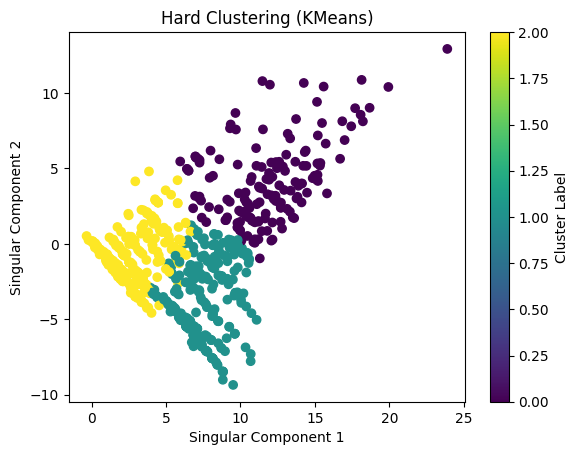

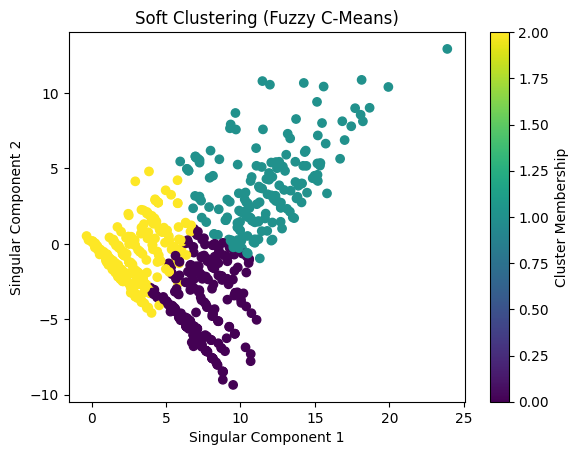

In [57]:
import matplotlib.pyplot as plt

plt.scatter(data_reduced_svd[:, 0], data_reduced_svd[:, 1], c=hard_cluster_labels, cmap='viridis')
plt.title('Hard Clustering (KMeans)')
plt.xlabel('Singular Component 1')
plt.ylabel('Singular Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

plt.scatter(data_reduced_svd[:, 0], data_reduced_svd[:, 1], c=soft_cluster_labels, cmap='viridis')
plt.title('Soft Clustering (Fuzzy C-Means)')
plt.xlabel('Singular Component 1')
plt.ylabel('Singular Component 2')
plt.colorbar(label='Cluster Membership')
plt.show()


Dimensionality Reduction using Singular Value Decomposition (SVD):

The code appears to reduce the dimensionality of the dataset using Singular Value Decomposition (SVD).
SVD is a technique used to decompose a matrix into its singular vectors and singular values, which can then be used to represent the data in a lower-dimensional space.
By applying SVD to the data, the original features are transformed into a set of singular components, which capture the most significant patterns and variations in the data.
Hard Clustering with KMeans:

KMeans clustering is applied to the reduced dataset obtained from SVD, where n_components_90 likely represents the number of components chosen to retain 90% of the variance in the data.
KMeans is a partitioning algorithm that assigns each data point to a single cluster based on the nearest centroid.
The resulting clusters are represented by hard cluster labels, where each data point is assigned to a distinct cluster.
The scatter plot visualizes the results of hard clustering, with each point colored according to its assigned cluster label.
Soft Clustering with Fuzzy C-Means:

Fuzzy C-Means clustering is performed on the same reduced dataset obtained from SVD, using the same number of components (n_components_90) as KMeans.
Fuzzy C-Means assigns membership values to each data point for every cluster, indicating the degree of belongingness to each cluster.
This allows for soft cluster assignments, where data points may have partial memberships to multiple clusters.
The scatter plot visualizes the results of soft clustering, with colors representing the degree of membership of each data point to each cluster.
Comparison:

By comparing the two scatter plots, one can observe the differences between hard and soft clustering approaches.
Hard clustering provides discrete cluster assignments, while soft clustering offers a more nuanced view of cluster memberships.
Soft clustering is useful when data points exhibit ambiguity or belong to multiple clusters simultaneously, whereas hard clustering is suitable for datasets with clear-cut clusters.
Visualization:

Both scatter plots display the reduced dataset in a two-dimensional space, with the first and second singular components plotted on the x-axis and y-axis, respectively.
The color of each point in the scatter plots represents either the assigned cluster label (for hard clustering) or the degree of membership to each cluster (for soft clustering).